# 频率直方图

NameError: name 'bpdf' is not defined

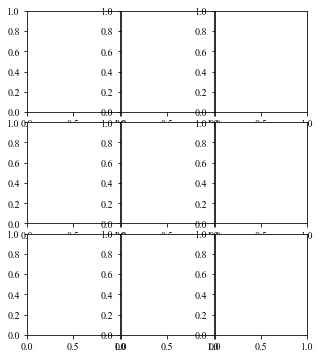

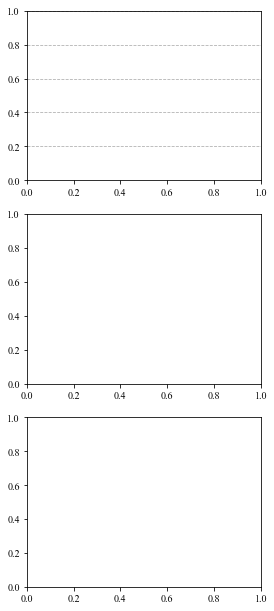

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import rcParams
plt.rc('font',family='Times New Roman') 
rcParams['mathtext.default'] = 'regular'

# 找一个画布
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(6, 6))
plt.subplots_adjust(left=0.2, right=0.85, top=0.9, bottom=0.15, wspace=0.01, hspace=0.1) # 调节子图的位置

## 找一个画布
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(5, 10))

# fig.suptitle("文献数量分布", fontsize=18)
plt.subplots_adjust(left=0.2, right=0.85, top=0.95, bottom=0.15, wspace=0.01, hspace=0.2)

# ax
ax = axes[0]
ax.grid(axis="y", linestyle="--")

bins = 50
ax.hist(bpdf["文献数量"], bins, width=1.9, color="#da9696", alpha = 1, label='细菌', density=True)
ax.axvline(bpdf["文献数量"].mean(), color="#da9696", linestyle='dashed', linewidth=2) # 平均值
ax.text(bpdf["文献数量"].mean()*1.2, 0.15, '平均文献数: {:.2f}'.format(bpdf["文献数量"].mean()), fontsize=12) # 标注平均值的数值

ax.tick_params(axis='x', labelsize=12)
ax.set_xlim((0, 100))
x_ticks = np.linspace(0, 100, 5)
ax.set_xticks(x_ticks)
ax.tick_params(axis='y', labelsize=12)
ax.set_ylim((0, 0.5))
y_ticks = np.linspace(0, 0.5, 4)
ax.set_yticks(y_ticks)

ax.legend(fontsize='x-large', loc=0, frameon=True, bbox_to_anchor=(1, 1))

# save
# plt.savefig('demo.svg', bbox_inches='tight')

# show
plt.show()

# 分层堆积图

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import rcParams
plt.rc('font',family='Simsun') 
rcParams['mathtext.default'] = 'regular'


results = {
    '细菌': [bdf_sex.loc["none","性别比例"],bdf_sex.loc["男","性别比例"],bdf_sex.loc["女","性别比例"]],
    '真菌': [mdf_sex.loc["none","性别比例"],mdf_sex.loc["男","性别比例"],mdf_sex.loc["女","性别比例"]],
    '病毒': [vdf_sex.loc["none","性别比例"],vdf_sex.loc["男","性别比例"],vdf_sex.loc["女","性别比例"]],
}
category_names = [ '缺失','男','女']
category_colors = ["#bebebe", "#8eb3d1", "#da9696"]
# 获取标签、数值
labels = list(results.keys())
data = np.array(list(results.values()))
data_cum = data.cumsum(axis=1) # 逐项加和

fig, ax = plt.subplots(figsize=(5, 5))

for i, (colname, color) in enumerate(zip(category_names, category_colors)):
    heights = data[:, i]
    starts = data_cum[:, i] - heights

    ax.bar(labels, heights, bottom=starts, width=0.5,
            label=colname, color=color)
    
    xcenters = starts + heights / 2
    text_color = '#000000'
    for y, (x, c) in enumerate(zip(xcenters, heights)):
        ax.text(y, x, '{:.2%}'.format(c), ha='center', va='center',
                color=text_color, fontsize=12)

ax.tick_params(axis='x', labelsize=16)
ax.set_xticklabels(labels=labels)
ax.set_ylim(0, 1)
ax.yaxis.set_visible(False)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], fontsize='x-large', loc=0, frameon=True, bbox_to_anchor=(1, 1))

plt.savefig('plot/patient_sex.svg', bbox_inches='tight')

plt.show()
